# Is New York City Getting Safer?

### Darrian Karimi, Trent Grabowski, Konstantine Kahadze

# Introduction

New York City is a place everyone visits at least once in their life. It is talked about all the time, movie sets take place in it, and it is known as the city that never sleeps. People tend to go there for the holidays all the time especially Christmas and New Years. NYC is the biggest city in the United States by population because people keep moving there. With such a rise in population, that must mean that crimes are at an increase as well. We will analyze all the arrests that have occured in New York City ranging from the years 2010 - 2021 to be able to determine if the city is becoming safer. We also analyze the amount of arrests that has occurred within each five boroughs of NYC and determine which is the safest and how much they are actually changing per year.

In [1]:
!pip install folium
import folium
import numpy as np
import requests
import pandas as pd
import datetime
from folium.plugins import MarkerCluster
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor

# Initial Data Collection 

We were able to find a CSV file of every arrest that has occured within New York City dating back from 2006 to 2020 as well as another CSV file of all arrests from January 2021 to September 2021. Thankfully being a CSV file, it did not require much from us to be able to read it in and turn it into a dataframe for interpretation. 

Using the first CSV file, we read it in and store it in a table called "arrest_table". We then use the "arrest_date" attribute in the first table to make a new column "year" that stores the corresponding year of each arrest. This new attribute will allow us to easily seperate the dataframe by year as well as filter the data to include arrests from 2010 onwards. 

Using the second CSV file, we read and store the file in a dataframe called "table2021". With it being just a single year, we did not have to make the separate column as the previous file.


To find more information regarding the first dataset:
https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u

To find more information regarding the second dataset:
https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/data




  

In [2]:
# New York City arrest Table Jan 2010 - December 2020:

# Read in the csv file into a pandas dataframe
arrest_table = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")
# Create 'year' attribute from existing 'ARREST_DATE' attribute
arrest_table['year'] = arrest_table['ARREST_DATE'].str[-4:]

# Filter dataframe with arrests from 2010 onwards
arrest_table = arrest_table[arrest_table['year'] >= '2010']
arrest_table

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,year
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045),2019
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007),2019
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035),2016
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),2018
6,189182271,10/24/2018,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,M,5,0.0,45-64,M,WHITE HISPANIC,984946.0,200203.0,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153364,207601040,01/08/2020,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,M,1,1.0,25-44,M,BLACK HISPANIC,980772.0,194845.0,40.701489,-74.012545,POINT (-74.01254496799999 40.70148881400007),2020
5153365,206891807,01/01/2020,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,90,0.0,<18,M,BLACK,993514.0,197321.0,40.708281,-73.966587,POINT (-73.96658711699997 40.70828068800005),2020
5153366,207760542,01/11/2020,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,13,0.0,25-44,M,WHITE,986464.0,208227.0,40.738220,-73.992012,POINT (-73.99201218099995 40.73821959500003),2020
5153367,206896678,01/01/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,111,0.0,45-64,M,BLACK,1053534.0,211808.0,40.747777,-73.749952,POINT (-73.74995244099993 40.74777741400004),2020


In [3]:
# New York City arrest table Jan 2021 - September 2021

# Read csv file into a pandas dataframe
table2021 = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")
table2021

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)


#### 

### Here we are splitting the large dataframe up by the years into separate dataframes making it easier to organize the data and manipulate it later down the road.

In [4]:
# Creating individual dataframes for each year
table2010 = arrest_table[arrest_table['year'] == '2010']
table2011 = arrest_table[arrest_table['year'] == '2011']
table2012 = arrest_table[arrest_table['year'] == '2012']
table2013 = arrest_table[arrest_table['year'] == '2013']
table2014 = arrest_table[arrest_table['year'] == '2014']
table2015 = arrest_table[arrest_table['year'] == '2015']
table2016 = arrest_table[arrest_table['year'] == '2016']
table2017 = arrest_table[arrest_table['year'] == '2017']
table2018 = arrest_table[arrest_table['year'] == '2018']
table2019 = arrest_table[arrest_table['year'] == '2019']
table2020 = arrest_table[arrest_table['year'] == '2020']

#### 

### We now begin to clean up each dataset by dropping irrelevent/extraneous columns and renaming the columns we kept so they are easier to understand what it represents. 

### We are creating variables that store the length of the entire table which represneting the total amount of arrests that have occured in each borough per year. These length/counts will be used for plotting below
 

In [5]:
# Number of total arrests in NYC in 2010
len2010 = len(table2010)

# Number of total arrests in Bronx in 2010
bronxA2010 = len(table2010[table2010['ARREST_BORO'] == 'B'])
# Number of total arrests in Staten Island in 2010
statenA2010 = len(table2010[table2010['ARREST_BORO'] == 'S'])
# Number of total arrests in Brooklyn in 2010
brooklynA2010 = len(table2010[table2010['ARREST_BORO'] == 'K'])
# Number of total arrests in Manhattan in 2010
manhattanA2010 = len(table2010[table2010['ARREST_BORO'] == 'M'])
# Number of total arrests in Queens in 2010
queensA2010 = len(table2010[table2010['ARREST_BORO'] == 'Q'])


In [6]:
# Similarly for 2011...
len2011 = len(table2011)

bronxA2011 = len(table2011[table2011['ARREST_BORO'] == 'B'])
statenA2011 = len(table2011[table2011['ARREST_BORO'] == 'S'])
brooklynA2011 = len(table2011[table2011['ARREST_BORO'] == 'K'])
manhattanA2011 = len(table2011[table2011['ARREST_BORO'] == 'M'])
queensA2011 = len(table2011[table2011['ARREST_BORO'] == 'Q'])


In [7]:
# Similarly for 2012...
len2012 = len(table2012)

bronxA2012 = len(table2012[table2012['ARREST_BORO'] == 'B'])
statenA2012 = len(table2012[table2012['ARREST_BORO'] == 'S'])
brooklynA2012 = len(table2012[table2012['ARREST_BORO'] == 'K'])
manhattanA2012 = len(table2012[table2012['ARREST_BORO'] == 'M'])
queensA2012 = len(table2012[table2012['ARREST_BORO'] == 'Q'])


In [8]:
# Similarly for 2013...
len2013 = len(table2013)

bronxA2013 = len(table2013[table2013['ARREST_BORO'] == 'B'])
statenA2013 = len(table2013[table2013['ARREST_BORO'] == 'S'])
brooklynA2013 = len(table2013[table2013['ARREST_BORO'] == 'K'])
manhattanA2013 = len(table2013[table2013['ARREST_BORO'] == 'M'])
queensA2013 = len(table2013[table2013['ARREST_BORO'] == 'Q'])


In [9]:
# Similarly for 2014...
len2014 = len(table2014)

bronxA2014 = len(table2014[table2014['ARREST_BORO'] == 'B'])
statenA2014 = len(table2014[table2014['ARREST_BORO'] == 'S'])
brooklynA2014 = len(table2014[table2014['ARREST_BORO'] == 'K'])
manhattanA2014 = len(table2014[table2014['ARREST_BORO'] == 'M'])
queensA2014 = len(table2014[table2014['ARREST_BORO'] == 'Q'])


In [10]:
# Similarly for 2015...
len2015 = len(table2015)

bronxA2015 = len(table2015[table2015['ARREST_BORO'] == 'B'])
statenA2015 = len(table2015[table2015['ARREST_BORO'] == 'S'])
brooklynA2015 = len(table2015[table2015['ARREST_BORO'] == 'K'])
manhattanA2015 = len(table2015[table2015['ARREST_BORO'] == 'M'])
queensA2015 = len(table2015[table2015['ARREST_BORO'] == 'Q'])


In [11]:
# Similarly for 2016...
len2016 = len(table2016)

bronxA2016 = len(table2016[table2016['ARREST_BORO'] == 'B'])
statenA2016 = len(table2016[table2016['ARREST_BORO'] == 'S'])
brooklynA2016 = len(table2016[table2016['ARREST_BORO'] == 'K'])
manhattanA2016 = len(table2016[table2016['ARREST_BORO'] == 'M'])
queensA2016 = len(table2016[table2016['ARREST_BORO'] == 'Q'])


In [12]:
# Similarly for 2017...
len2017 = len(table2017)

bronxA2017 = len(table2017[table2017['ARREST_BORO'] == 'B'])
statenA2017 = len(table2017[table2017['ARREST_BORO'] == 'S'])
brooklynA2017 = len(table2017[table2017['ARREST_BORO'] == 'K'])
manhattanA2017 = len(table2017[table2017['ARREST_BORO'] == 'M'])
queensA2017 = len(table2017[table2017['ARREST_BORO'] == 'Q'])


In [13]:
# Similarly for 2018...
len2018 = len(table2018)

bronxA2018 = len(table2018[table2018['ARREST_BORO'] == 'B'])
statenA2018 = len(table2018[table2018['ARREST_BORO'] == 'S'])
brooklynA2018 = len(table2018[table2018['ARREST_BORO'] == 'K'])
manhattanA2018 = len(table2018[table2018['ARREST_BORO'] == 'M'])
queensA2018 = len(table2018[table2018['ARREST_BORO'] == 'Q'])


In [14]:
# Similarly for 2019...
len2019 = len(table2019)

bronxA2019 = len(table2019[table2019['ARREST_BORO'] == 'B'])
statenA2019 = len(table2019[table2019['ARREST_BORO'] == 'S'])
brooklynA2019 = len(table2019[table2019['ARREST_BORO'] == 'K'])
manhattanA2019 = len(table2019[table2019['ARREST_BORO'] == 'M'])
queensA2019 = len(table2019[table2019['ARREST_BORO'] == 'Q'])


In [15]:
# Similarly for 2020...
len2020 = len(table2020)
bronxA2020 = len(table2020[table2020['ARREST_BORO'] == 'B'])
statenA2020 = len(table2020[table2020['ARREST_BORO'] == 'S'])
brooklynA2020 = len(table2020[table2020['ARREST_BORO'] == 'K'])
manhattanA2020 = len(table2020[table2020['ARREST_BORO'] == 'M'])
queensA2020 = len(table2020[table2020['ARREST_BORO'] == 'Q'])


In [16]:

len2021 = len(table2021)
table2021['Latitude'] = table2021['Latitude'].astype(float)
table2021['Longitude'] = table2021['Longitude'].astype(float)
table2021 = table2021.drop(columns=['JURISDICTION_CODE', 'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD',
                                         'New Georeferenced Column', 'LAW_CODE', 'PD_CD', 'KY_CD'])
table2021.rename({'ARREST_DATE': 'Date', 'PERP_SEX': 'Sex', 'PERP_RACE': 'Race', 'AGE_GROUP': 'Age'}, axis='columns', inplace=True)

#### 
### We are now creating a regression plot representing the number of arrests occured in New York City over time.  

Text(0.5, 1.0, 'Number of Arrests in NYC vs Time (2010-2021)')

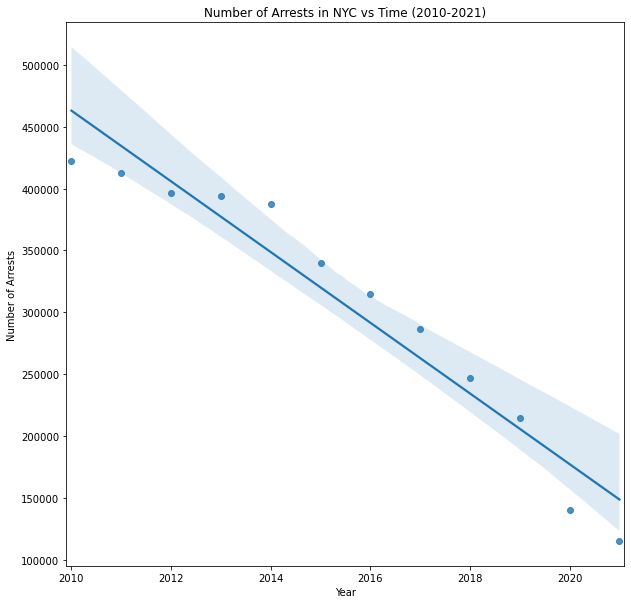

In [17]:
# Using the annual arrest counts from above, populate a corresponding dataframe and plot results
plt.figure(figsize=(10,10))
xval = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
yval = [len2010,len2011,len2012,len2013,len2014,len2015,len2016,len2017,len2018,len2019,len2020,len2021]
xval2 = [[2010,len2010], [2011,len2011], [2012,len2012], [2013,len2013], [2014,len2014], 
         [2015,len2015], [2016,len2016], [2017,len2017], [2018,len2018], [2019,len2019], [2020,len2020], [2021,len2021]]
numArrests = pd.DataFrame(xval2, columns=['Year', 'Num_Arrests'])
x = sns.regplot(x=numArrests["Year"], y=numArrests["Num_Arrests"])
x.set(xlim=(2009.9, 2021.1))
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests in NYC vs Time (2010-2021)")


Based off the plot, we are able to see that the total number of annual arrests occuring within the city has decreased quite significantly about 64% from around 420,000 in 2010 to around 1500,00 in 2020. The total arrests have decreased between each subsequent year, with the exception of 2012-2013. 


### In this section, we will begin to check how the number of arrests between the boroughs compare over time.  First we create a dataframe with the total number of annual arrests for each borough. 

In [18]:
# Using the annual arrest counts per borough caculated above, populate a new dataframe

bronxval2 = [[2010,bronxA2010], [2011,bronxA2011], [2012,bronxA2012], [2013,bronxA2013], [2014,bronxA2014], 
         [2015,bronxA2015], [2016,bronxA2016], [2017,bronxA2017], [2018,bronxA2018], [2019,bronxA2019], [2020,bronxA2020]]
bronxArrest = pd.DataFrame(bronxval2, columns=['years','Arrests'])
borough = pd.DataFrame()
borough = bronxArrest
borough.rename({'Arrests':'Bronx_Arrest'}, axis='columns', inplace=True)
borough['Staten_Arrest'] = [statenA2010,statenA2011,statenA2012,statenA2013,statenA2014,statenA2015,statenA2016,statenA2017,statenA2018,statenA2019,statenA2020]
borough['Brooklyn_Arrest'] = [brooklynA2010,brooklynA2011,brooklynA2012,brooklynA2013,brooklynA2014,brooklynA2015,brooklynA2016,brooklynA2017,brooklynA2018,brooklynA2019,brooklynA2020]
borough['Manhattan_Arrest'] = [manhattanA2010,manhattanA2011,manhattanA2012,manhattanA2013,manhattanA2014,manhattanA2015,manhattanA2016,manhattanA2017,manhattanA2018,manhattanA2019,manhattanA2020]
borough['Queens_Arrest'] = [queensA2010,queensA2011,queensA2012,queensA2013,queensA2014,queensA2015,queensA2016,queensA2017,queensA2018,queensA2019,queensA2020]

# Create a new attribute to represent the years since 2010
borough['years_since_2010'] = borough['years'].astype(int) - 2010
borough

,years,Bronx_Arrest,Staten_Arrest,Brooklyn_Arrest,Manhattan_Arrest,Queens_Arrest,years_since_2010
0,2010,100535,14261,117900,113185,76441,0
1,2011,96877,14025,117764,110990,73203,1
2,2012,89963,13019,113321,108954,71022,2
3,2013,85859,12721,109568,109742,75919,3
4,2014,85679,13277,106677,106188,75906,4
5,2015,75460,11118,93191,93961,65740,5
6,2016,69212,12344,87607,85357,60344,6
7,2017,62821,11378,80082,76205,55739,7
8,2018,55446,10424,68405,62582,49916,8
9,2019,48815,9032,58288,53915,44567,9


### Now we are going to plot a line graph of each borough and their number of arrests per year all on one plot. This will help visualiize the differences in each borough showing which one is safer and how they change over time.

Text(0.5, 1.0, 'Arrests Made Per Borough Over Time (2010-2020)')

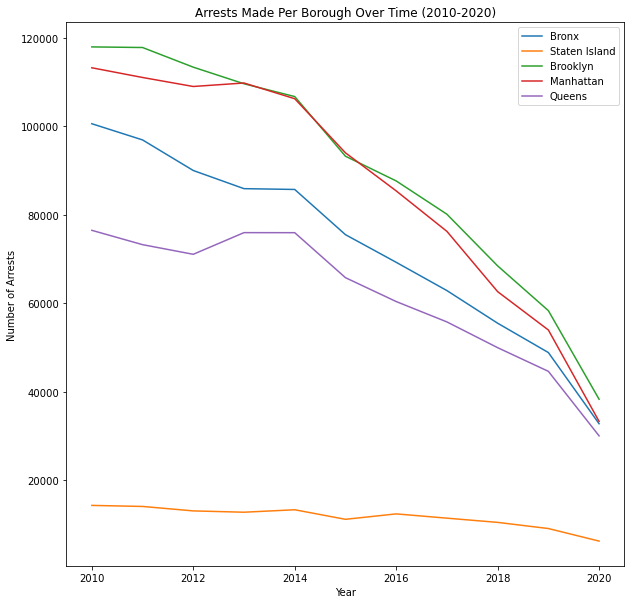

In [19]:
plt.figure(figsize=(10,10))
sns.lineplot(x=borough['years'], y=borough['Bronx_Arrest'])  
sns.lineplot(x=borough['years'], y=borough['Staten_Arrest'])
sns.lineplot(x=borough['years'], y=borough['Brooklyn_Arrest'])
sns.lineplot(x=borough['years'], y=borough['Manhattan_Arrest'])
sns.lineplot(x=borough['years'], y=borough['Queens_Arrest']) 

plt.legend(["Bronx", "Staten Island", "Brooklyn", "Manhattan", "Queens"])
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Arrests Made Per Borough Over Time (2010-2020)")

From this plot you can see that the number of annual arrests has decreased across all boroughs from 2010 - 2020, as expected. Interestingly, the number of arrests within years 2010 to 2014 were decreasing at a much slower rate than 2014 to 2021. This plot also highlights some of the trends across boroughs. Staten Island has significantly less annual crime when compared to the other borough and also decreased significantly less during the decade. On the other hand, Brooklyn and Manhattan seem to be the boroughs with the most crime. 

### Next, we will create a bar graph comparing the number of arrests per month within each borough. For this we will create a new column in the original arrest table specifying the month. After, we take the total number of arrests for each month per borough and store it as a list. Followng that, we plot the bar graphs to visualize the differences of boroughs and how the amount of crime varies per month.


Text(0, 0.5, 'Number of Arrests')

<Figure size 720x720 with 0 Axes>

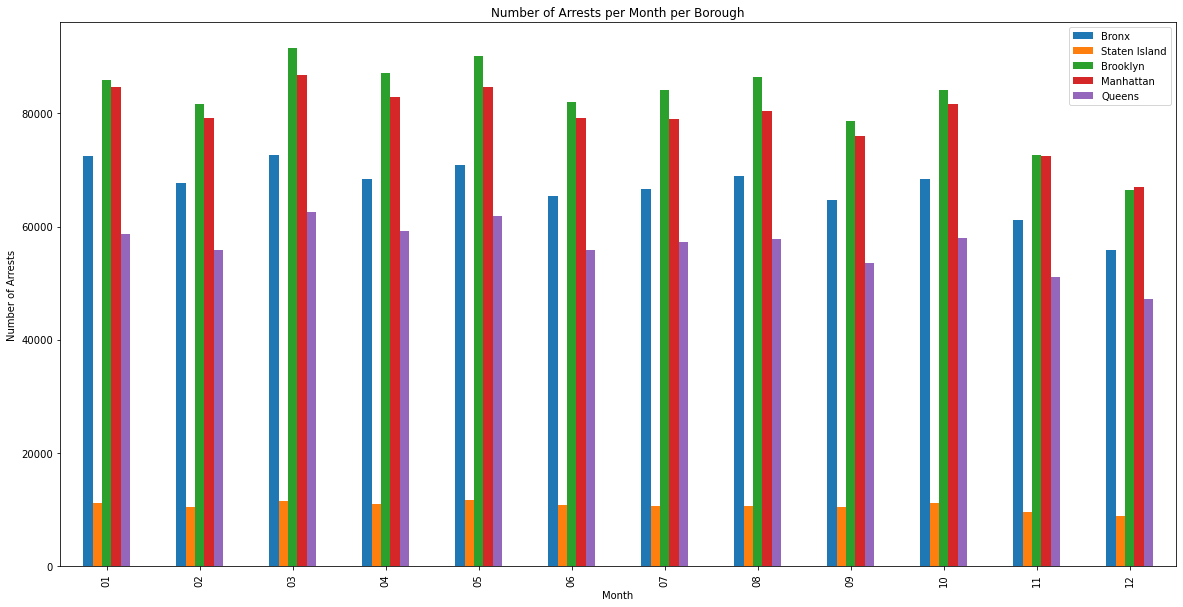

In [20]:
plt.figure(figsize=(10,10))
arrest_table['Month'] = arrest_table['ARREST_DATE'].str[:2]
df = arrest_table
df = df.filter(['ARREST_BORO', 'year', 'Month'])

Bronx = df[df['ARREST_BORO'] == 'B']
totalB = [len(Bronx[Bronx['Month'] == '01']), len(Bronx[Bronx['Month'] == '02']), len(Bronx[Bronx['Month'] == '03']), len(Bronx[Bronx['Month'] == '04']), len(Bronx[Bronx['Month'] == '05']),len(Bronx[Bronx['Month'] == '06']),len(Bronx[Bronx['Month'] == '07']),len(Bronx[Bronx['Month'] == '08']),len(Bronx[Bronx['Month'] == '09']),len(Bronx[Bronx['Month'] == '10']),len(Bronx[Bronx['Month'] == '11']),len(Bronx[Bronx['Month'] == '12'])]

staten = df[df['ARREST_BORO'] == 'S']
totalS = [len(staten[staten['Month'] == '01']), len(staten[staten['Month'] == '02']), len(staten[staten['Month'] == '03']), len(staten[staten['Month'] == '04']), len(staten[staten['Month'] == '05']),len(staten[staten['Month'] == '06']),len(staten[staten['Month'] == '07']),len(staten[staten['Month'] == '08']),len(staten[staten['Month'] == '09']),len(staten[staten['Month'] == '10']),len(staten[staten['Month'] == '11']),len(staten[staten['Month'] == '12'])]

brooklyn = df[df['ARREST_BORO'] == 'K']
totalBr = [len(brooklyn[brooklyn['Month'] == '01']), len(brooklyn[brooklyn['Month'] == '02']), len(brooklyn[brooklyn['Month'] == '03']), len(brooklyn[brooklyn['Month'] == '04']), len(brooklyn[brooklyn['Month'] == '05']),len(brooklyn[brooklyn['Month'] == '06']),len(brooklyn[brooklyn['Month'] == '07']),len(brooklyn[brooklyn['Month'] == '08']),len(brooklyn[brooklyn['Month'] == '09']),len(brooklyn[brooklyn['Month'] == '10']),len(brooklyn[brooklyn['Month'] == '11']),len(brooklyn[brooklyn['Month'] == '12'])]

manhattan = df[df['ARREST_BORO'] == 'M']
totalM = [len(manhattan[manhattan['Month'] == '01']), len(manhattan[manhattan['Month'] == '02']), len(manhattan[manhattan['Month'] == '03']), len(manhattan[manhattan['Month'] == '04']), len(manhattan[manhattan['Month'] == '05']),len(manhattan[manhattan['Month'] == '06']),len(manhattan[manhattan['Month'] == '07']),len(manhattan[manhattan['Month'] == '08']),len(manhattan[manhattan['Month'] == '09']),len(manhattan[manhattan['Month'] == '10']),len(manhattan[manhattan['Month'] == '11']),len(manhattan[manhattan['Month'] == '12'])]

queens = df[df['ARREST_BORO'] == 'Q']
totalQ = [len(queens[queens['Month'] == '01']), len(queens[queens['Month'] == '02']), len(queens[queens['Month'] == '03']), len(queens[queens['Month'] == '04']), len(queens[queens['Month'] == '05']),len(queens[queens['Month'] == '06']),len(queens[queens['Month'] == '07']),len(queens[queens['Month'] == '08']),len(queens[queens['Month'] == '09']),len(queens[queens['Month'] == '10']),len(queens[queens['Month'] == '11']),len(queens[queens['Month'] == '12'])]

arrest_table['Month'] = arrest_table['ARREST_DATE'].str[:2]
df = arrest_table
df = df.filter(['ARREST_BORO', 'year', 'Month'])
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

plotD = pd.DataFrame( {
    "Bronx": totalB,
    "Staten Island": totalS,
    "Brooklyn": totalBr,
    "Manhattan": totalM,
    "Queens":totalQ},
    index=month
)

plotD.plot(kind="bar", figsize=(20,10))
plt.title("Number of Arrests per Month per Borough")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

Based on this bar graph, it shows that Staten Island has kept a constant trend of having a low number of arrests throughout the year.  Brooklyn has has been the highest except for December where Manhattan sightly overtakes it.  The month of December seems to have the lowest number of Arrests throughout the year and March has the most amount of arrests per year.  A conclusion that could be made is that Brooklyn is the borough that has the most amount of people being arrested so making it seem to be the most dangerous.

## Preprocessing the data to prepare for regression

We will attempt to build a regression model to predict the total arrests for a given burough during a given moth. This model will take 2 attributes as input: the number of months since January 2010 and the specific month in question (as an integer represnetaiton. i.e. 0 = Jan, 1 = Feb, ... 11 = Dec)

In [21]:
# Creates a dataframe 'bd' which will contain brooklyn data from January 2010 to December 2020 which will be used in regression training/testing 


# Add a new column 'Month' to represent an integer represnetation of the month of each arrest
arrest_table['Month'] = arrest_table['ARREST_DATE'].str[:2]
bd = arrest_table[arrest_table['ARREST_BORO'] == 'K']
# Filter bd to contain only useful columns
bd = bd.filter(['year', 'Month', 'ARREST_BORO'])
# Create new column to represent the number of months since Janurary 2010
bd['since_jan_2010'] = (bd['year'].astype(int) - 2010) * 12 + bd['Month'].astype(int) - 1
# Create new column to represnet the integer representation of each month
bd['month_index'] = bd['Month'].astype(int) - 1
# Once again, filter bd 
bd = bd.filter(['month_index', 'since_jan_2010'])
bd

,month_index,since_jan_2010
3,0,72
4,10,106
7,3,111
15,10,106
16,0,108
...,...,...
5153335,0,120
5153338,0,120
5153346,0,120
5153363,0,120


In [22]:
# Similarly, create a dataframe 'bd_2021' which will contain 2021 brooklyn data which will be used in regression training/testing 


bd_2021 = table2021[table2021['ARREST_BORO'] == 'K']
bd_2021 = bd_2021.filter(['Date', 'ARREST_BORO'])
bd_2021["month"] = bd_2021['Date'].str.slice(0,2).astype(int)
bd_2021["year"] = bd_2021['Date'].str.slice(6,10).astype(int)
bd_2021['month_index'] = bd_2021['month'] - 1
bd_2021['since_jan_2010'] = (bd_2021['year'] - 2010) * 12 + bd_2021['month_index']
bd_2021 = bd_2021.filter(['month_index', 'since_jan_2010'])
bd_2021

,month_index,since_jan_2010
1,8,140
6,8,140
9,8,140
15,7,139
16,7,139
...,...,...
115274,0,132
115280,0,132
115284,0,132
115288,0,132


In [23]:
# Concatenate brooklyn 2010 - 2020 data with brooklyn 2021 data into a single dataframe 'whole_brook'

whole_brook = pd.concat([bd, bd_2021], axis = 0)
whole_brook

,month_index,since_jan_2010
3,0,72
4,10,106
7,3,111
15,10,106
16,0,108
...,...,...
115274,0,132
115280,0,132
115284,0,132
115288,0,132


# START REGRESSION BEYOND THIS POINT

Here, we will see how well machine learning models can make predictions of crime in the coming months for a given
borough of NYC. Since we saw the highest amounts of crimes happening in Brooklyn for the chart of crimes in each month,
we will be using Brooklyn as an our example of predicting crimes in each borrow. Furthermore, this could help us
understand the area in NY with the worst crime, exaggerating the general direction that crime is taking in New York.
To test different regression models out, we will split the data into training and testing by using only 10% to test,
and then fit them to all of the models, eventually scoring each one against the training and testing data.

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Extract regressor input and expected output from whole_brook datafame
counts= []
month = []
since = []
for c, col in whole_brook.groupby(by=['since_jan_2010']):
    counts.append(len(col))
    month.append(c % 12)
    since.append(c)
    
combined = pd.DataFrame()
combined['counts'] = counts
combined['month'] = month
combined['since'] = since
X = np.asarray(combined.iloc[:, 1:]).reshape(-1 , 2)
y = np.asarray(combined.iloc[:, 0]).reshape(141,)

# Split brooklyn January 2010 - September 2021 data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 0)

# Test 6 different regressor models
three = svm.SVR(kernel = 'poly', degree = 3, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 3 test: " + str(three.score(X_test, y_test)) + ", train: " + str(three.score(X_train, y_train)))

four = svm.SVR(kernel = 'poly', degree = 4, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 4 test: " + str(four.score(X_test, y_test)) + ", train: " + str(four.score(X_train, y_train)))

five = svm.SVR(kernel = 'poly', degree = 5, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 5 test: " + str(five.score(X_test, y_test)) + ", train: " + str(five.score(X_train, y_train)))

eight = svm.SVR(kernel = 'poly', degree = 8, C = 1).fit(X_train, y_train)
print("polynomial regression of degree 8 test: " + str(eight.score(X_test, y_test)) + ", train: " + str(eight.score(X_train, y_train)))

rfr = RandomForestRegressor(max_depth = 6, n_estimators = 400).fit(X_train, y_train)
print("random forest regression test: " + str(rfr.score(X_test, y_test)) + ", train: " + str(rfr.score(X_train, y_train)))

etr = ExtraTreesRegressor(bootstrap = True, max_features = 2).fit(X_train, y_train)
print("extra trees regression test: " + str(etr.score(X_test, y_test)) + ", train: " + str(etr.score(X_train, y_train)))


polynomial regression of degree 3 test: 0.5335407322341624, train: 0.600509018129245
polynomial regression of degree 4 test: 0.7248762277226125, train: 0.7323711253070886
polynomial regression of degree 5 test: 0.7299339163464187, train: 0.7014793719178701
polynomial regression of degree 8 test: 0.5601089430694177, train: 0.5330104764507125
random forest regression test: 0.9521163390724551, train: 0.9846649981757676
extra trees regression test: 0.9433117112661465, train: 0.989747985304201


We saw here that the extra trees regressor outperformed all of the others, wit the random forest regressor coming in
as a close second. Though it may look like the training data is being slightly overfit, as a result of it scoring 0.99
on training data, it also scored extremely high on the testing data which shows it is not too overfit. Further, we 
stopped trying to keep increasing the degree of the polynomial we were doing regression with since it seemed like the
overfitting that that caused was making the model perform worse. The Extra Trees model fits randomized decision trees
to the model and uses averaging to improve performance. To learn more about different machine learning models in 
sklearn, you can go to https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble. To see whether
these models can realistically predict crime for the next few months, we will plot them to get a better look at how 
realistic these predictions seem despite the scores that they got on training and testing data

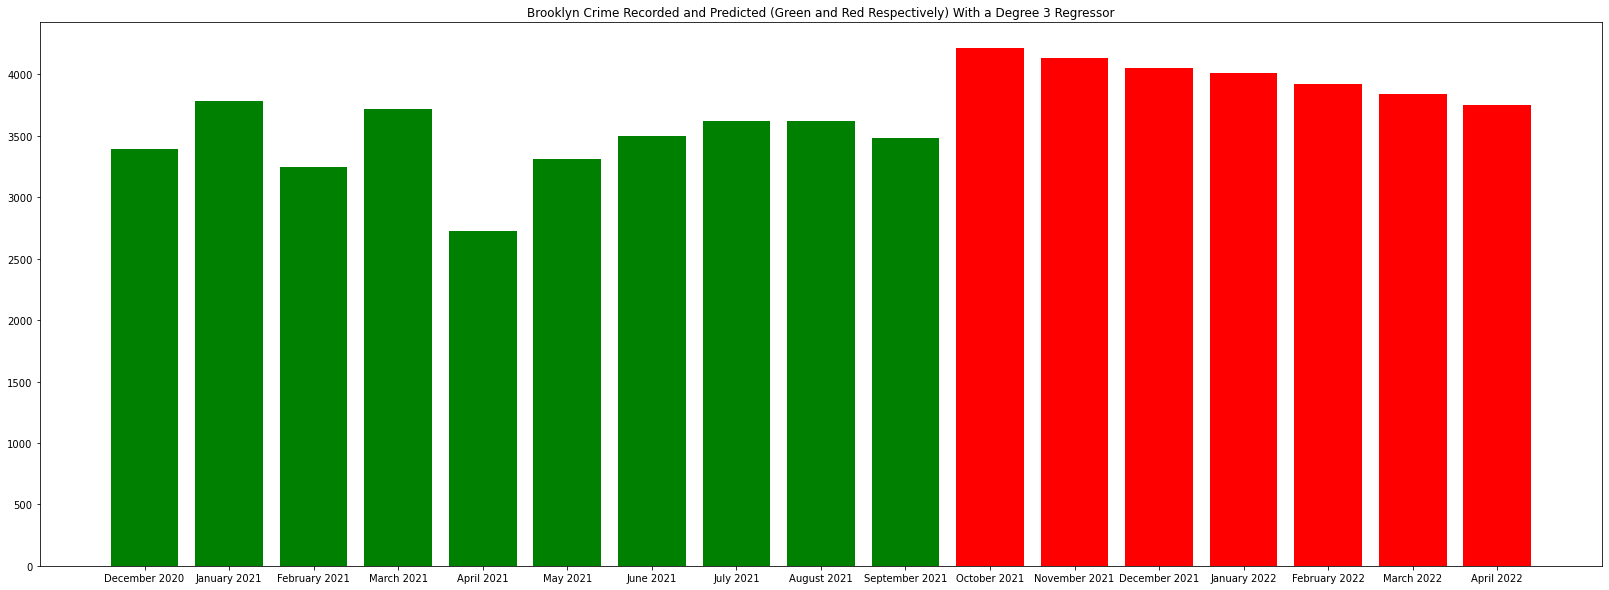

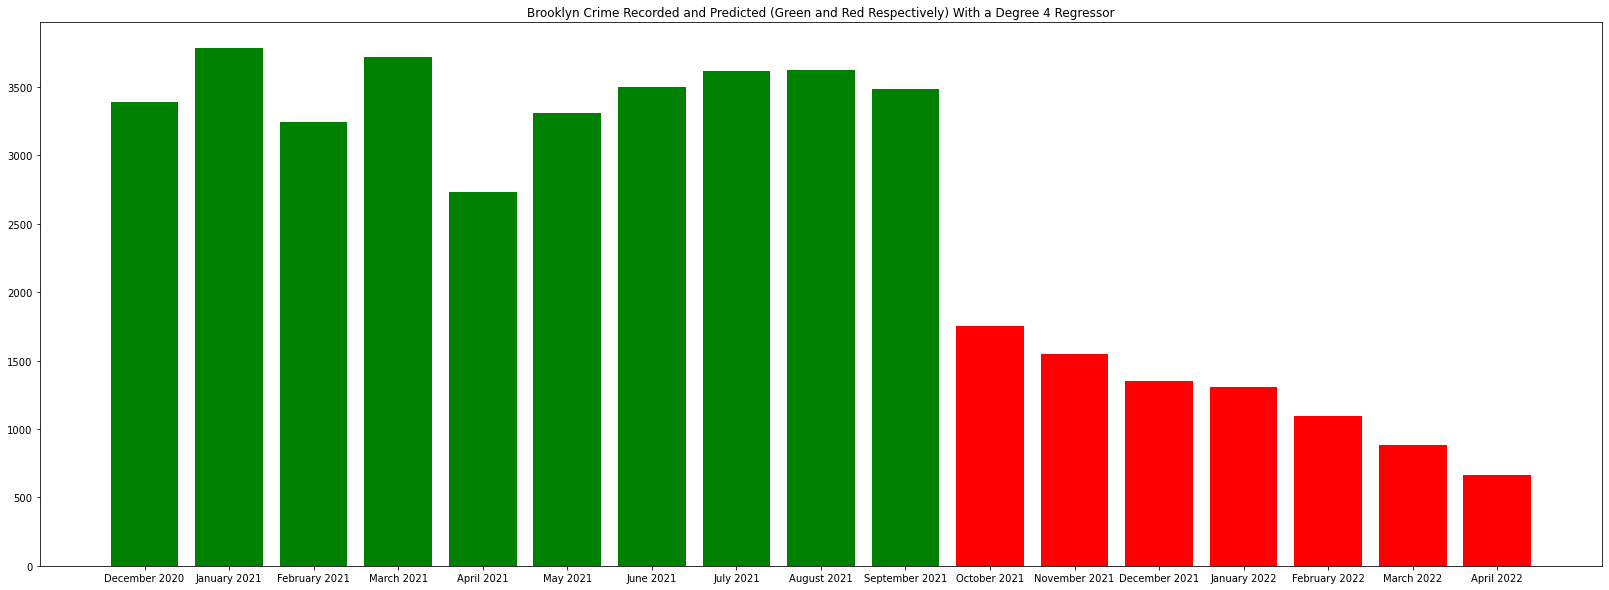

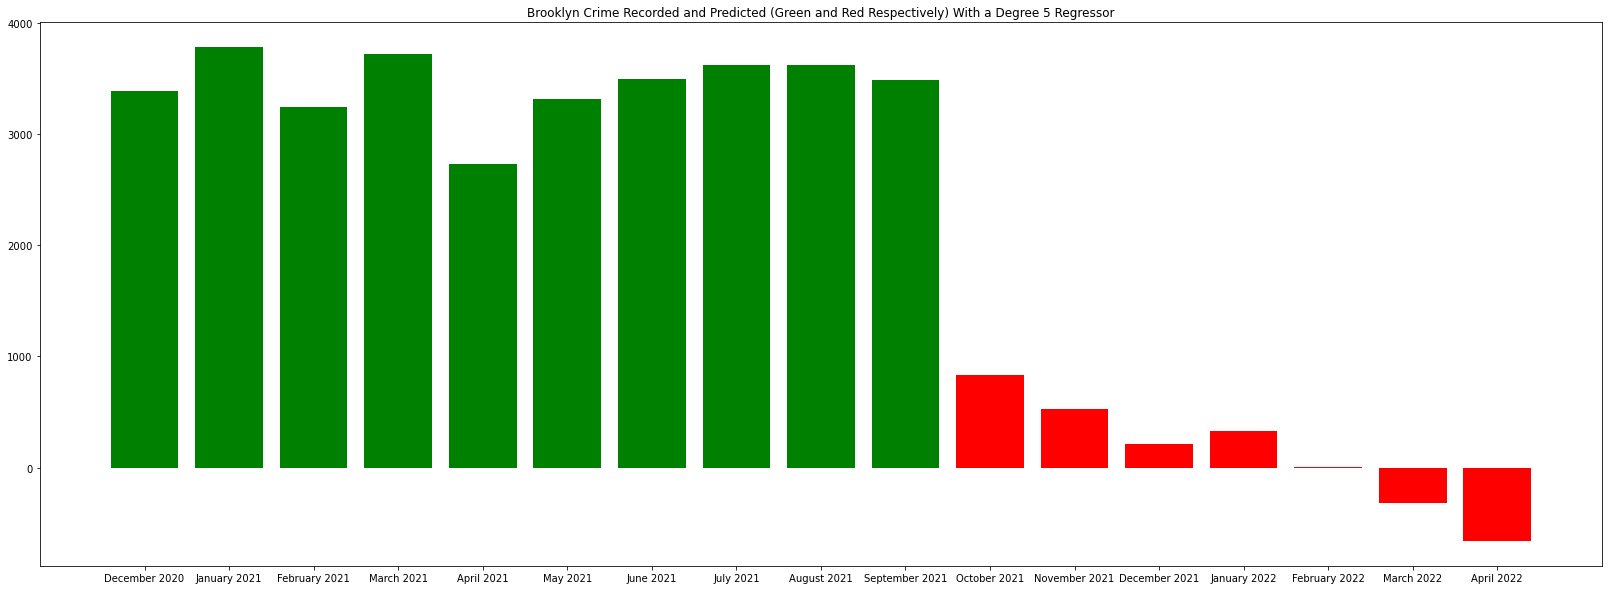

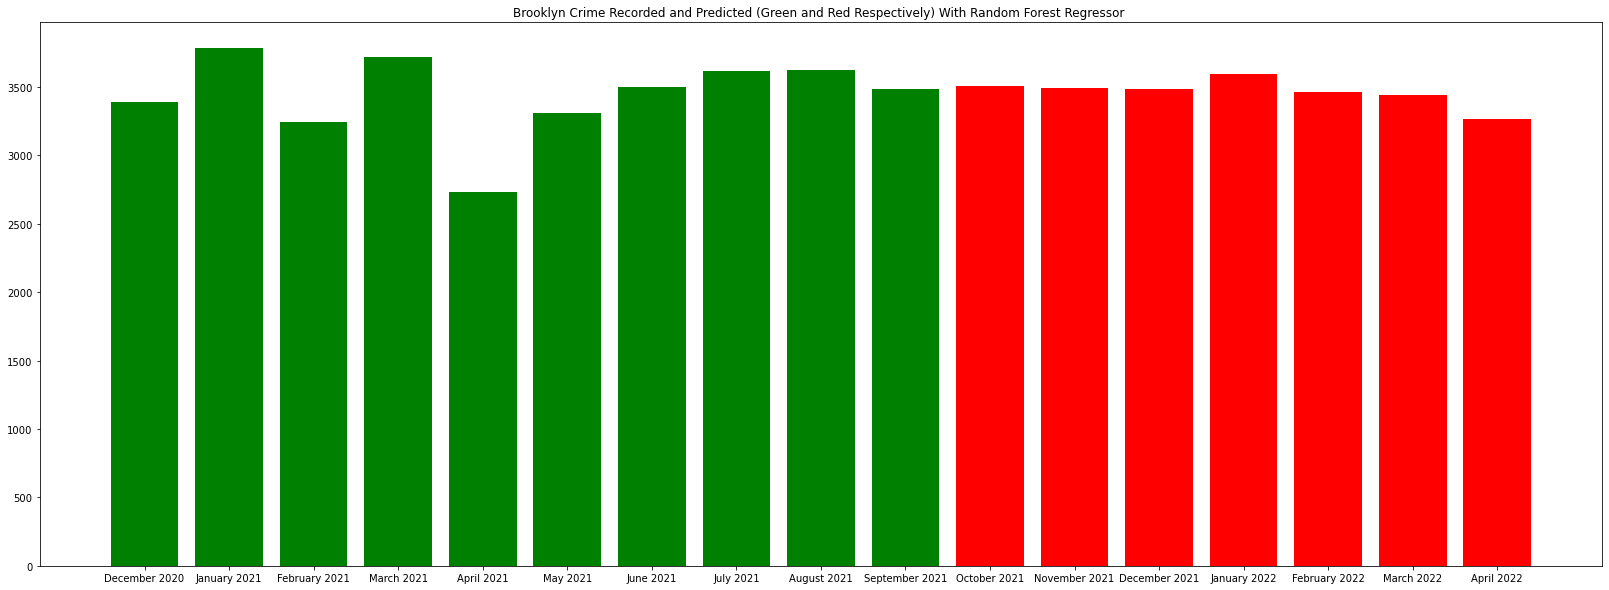

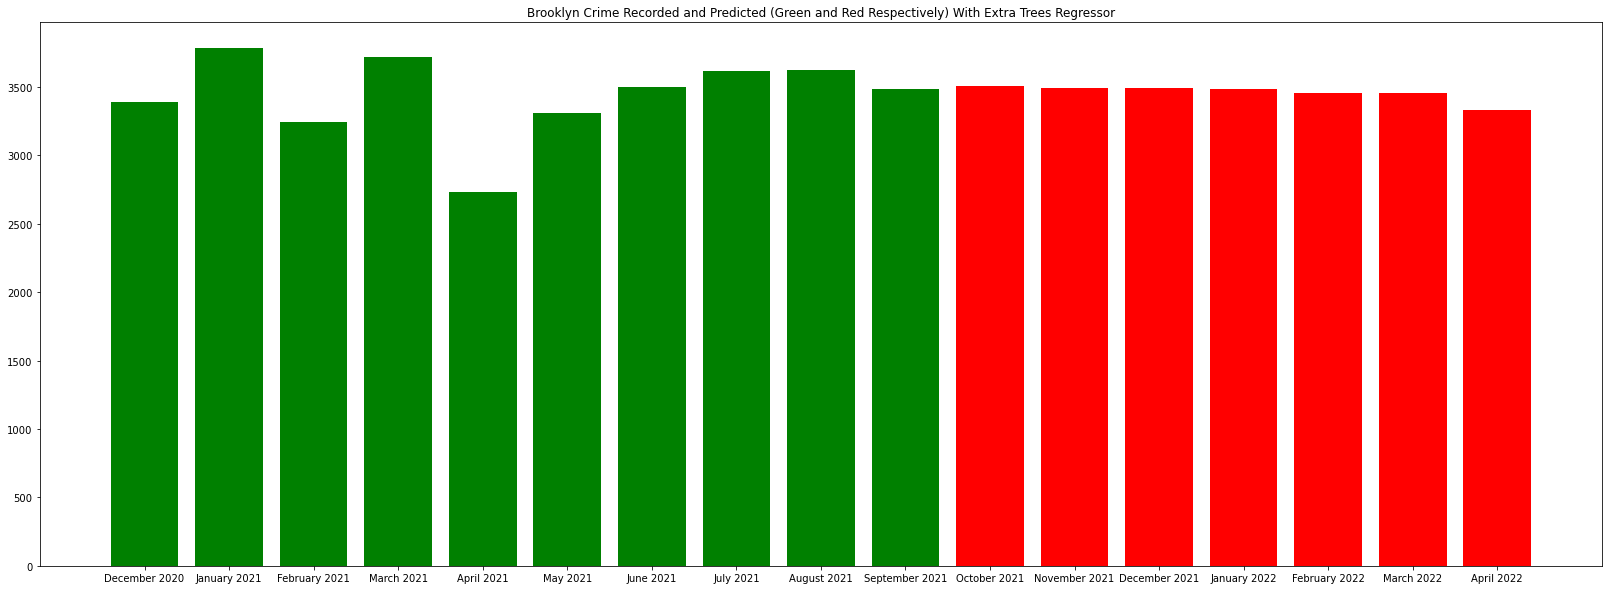

In [25]:
prev_ten = []
for i in range(0, 10):
    prev_ten.append(int(combined[combined['since'] > 130].counts.iloc[i]))

three_arr = []
for i in range(0,7):
    three_arr.append(int(three.predict([[(9 + i) % 12,141 + i]])))
    
four_arr = []
for i in range(0,7):
    four_arr.append(int(four.predict([[(9 + i) % 12,141 + i]])))

five_arr = []
for i in range(0,7):
    five_arr.append(int(five.predict([[(9 + i) % 12,141 + i]])))
    
five_arr = []
for i in range(0,7):
    five_arr.append(int(five.predict([[(9 + i) % 12,141 + i]])))
    
rf_arr = []
for i in range(0,7):
    rf_arr.append(int(rfr.predict([[(9 + i) % 12,141 + i]])))

et_arr = []
for i in range(0,7):
    et_arr.append(int(etr.predict([[(9 + i) % 12,141 + i]])))
    


col = ["Green", "Green", "Green", "Green", "Green", "Green", "Green", "Green", "Green", "Green", "Red", "Red", "Red", "Red", "Red", "Red", "Red"]
months = ["December 2020", "January 2021", "February 2021", "March 2021", "April 2021", "May 2021", "June 2021", "July 2021", "August 2021", "September 2021", "October 2021", "November 2021", "December 2021", "January 2022", "February 2022", "March 2022", "April 2022"]

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, three_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 3 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, four_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 4 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, five_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With a Degree 5 Regressor")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, rf_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With Random Forest Regressor ")
plt.show()

f, ax = plt.subplots(figsize=(28,10))
comb = np.concatenate((prev_ten, et_arr), axis = None)
plt.bar(months, comb, width = .8, color = col)
plt.title("Brooklyn Crime Recorded and Predicted (Green and Red Respectively) With Extra Trees Regressor")
plt.show()





As seen above, the most realistic predictors seem to be the Random Forest Regressor and the Extra Trees Regressor
which validates the scores that we got in the previous portion. Looking at the Extra Trees Regressor, it seems to accurately follow the expected trends as well. The predicted monthly arrest counts continue to decrease from October 2021 to April 2022, as expected. Furthermore, the model seems to accurately predict the monthly trends. The predicted crime slightly decreases between the months of January and Feburary then increases from Feburary to March, and then decreases once again from March to April. These predictions are consistent with the monthly trends for Brooklyn Crime from 2010 to 2021, which can bee seen in the "Number of Arrests per Month per Borough" bar plot above. 

# Conclusion

After looking at crime as a whole in NYC, taking cross sections of the data to fully understand it and visualizing it 
in different ways, it is apparent that these predictions that this machine learning model uses can be used to predict
where crime is headed in different boroughs in NYC. These predictive models could be used by nonprofit organizations,
governments and police forces thats serve the NYC area in order to be better prepared to handle crime and the other 
problems that crime brings in the regions and at the times where people may need it most. Though computers can only
learn from the data that we give them, they can be another resource when making decisions that can change the lives
of millions.